In [79]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [80]:
#데이터셋 불러오기
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

In [81]:
# 0~255사이 실수로 정규화
x_train = x_train /255.0
x_test = x_test/255.0

In [82]:
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [83]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)
print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


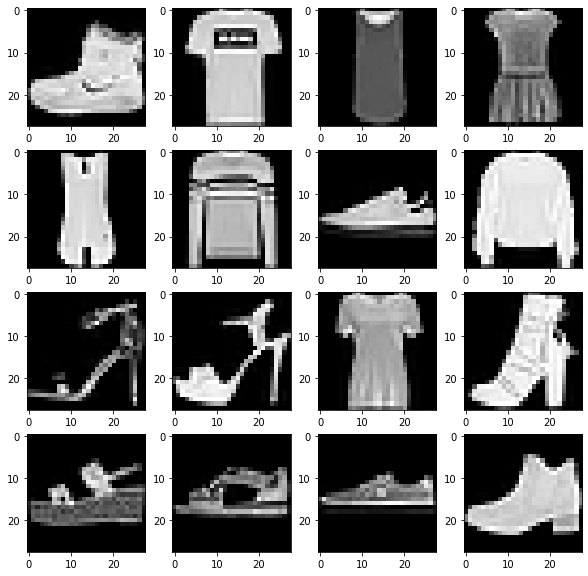

In [84]:
plt.figure(figsize=(10,10))

for c in range(16):
    plt.subplot(4,4, c+1)
    #plt.title(y_train[c])
    plt.imshow(x_train[c].reshape(28,28),cmap='gray')
plt.show()

In [85]:
print(y_train[:16])

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9]


In [86]:
#CNN network 구성
# Conv1 : (3,3) * 16filter, zero_padding
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1),kernel_size=(3,3), filters=16, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters=32, padding='valid', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters=64, padding='valid', activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
]) 

In [87]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [88]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 26, 26, 32)        4640      
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
flatten_5 (Flatten)          (None, 36864)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               4718720   
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 4,743,306
Trainable params: 4,743,306
Non-trainable params: 0
____________________________________________

In [89]:
#training  (train:validation = 72:25, epoch=25, batch_size=32)
#histrory
#loss, valid_loss, accuracy, val_accuracy
#plot

history = model.fit(x_train,y_train, epochs=25, validation_split=0.25)

Epoch 1/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.3869 - accuracy: 0.8606 - val_loss: 0.3070 - val_accuracy: 0.8882
Epoch 2/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2298 - accuracy: 0.9155 - val_loss: 0.2384 - val_accuracy: 0.9107
Epoch 3/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.1594 - accuracy: 0.9412 - val_loss: 0.2837 - val_accuracy: 0.9109
Epoch 4/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.1045 - accuracy: 0.9628 - val_loss: 0.2802 - val_accuracy: 0.9145
Epoch 5/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.0648 - accuracy: 0.9768 - val_loss: 0.3254 - val_accuracy: 0.9171
Epoch 6/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.0377 - accuracy: 0.9866 - val_loss: 0.3637 - val_accuracy: 0.9155
Epoch 7/25
1407/1407 [==============================] - 6s 5ms/step - loss: 0.0290 - accuracy: 0.9892 - val_loss: 0.4098 - val_accuracy:

In [90]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.0136 - accuracy: 0.9136


[1.0135773420333862, 0.9136000275611877]

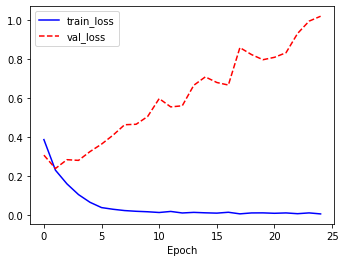

In [91]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label='train_loss')
plt.plot(history.history['val_loss'],'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

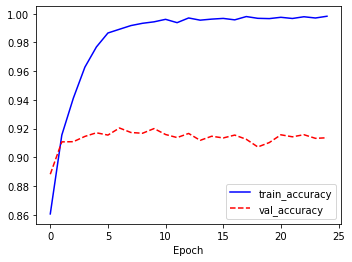

In [92]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'b-',label='train_accuracy')
plt.plot(history.history['val_accuracy'],'r--', label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [93]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1),kernel_size=(3,3), filters=32, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters=64, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters=128, padding='valid', activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(10, activation='softmax')
]) 

In [94]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [95]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
flatten_6 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)              

In [96]:
history = model.fit(x_train,y_train, epochs=25, validation_split=0.25)

Epoch 1/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.4880 - accuracy: 0.8224 - val_loss: 0.3391 - val_accuracy: 0.8761
Epoch 2/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.3071 - accuracy: 0.8890 - val_loss: 0.2773 - val_accuracy: 0.8974
Epoch 3/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2609 - accuracy: 0.9059 - val_loss: 0.2464 - val_accuracy: 0.9099
Epoch 4/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2300 - accuracy: 0.9154 - val_loss: 0.2496 - val_accuracy: 0.9101
Epoch 5/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2055 - accuracy: 0.9237 - val_loss: 0.2442 - val_accuracy: 0.9143
Epoch 6/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.1808 - accuracy: 0.9324 - val_loss: 0.2237 - val_accuracy: 0.9203
Epoch 7/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.1625 - accuracy: 0.9397 - val_loss: 0.2336 - val_accuracy:

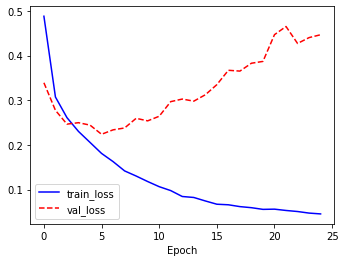

In [97]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label='train_loss')
plt.plot(history.history['val_loss'],'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

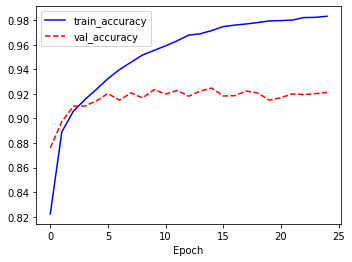

In [98]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'b-',label='train_accuracy')
plt.plot(history.history['val_accuracy'],'r--', label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [99]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.5167 - accuracy: 0.9170


[0.5167145133018494, 0.9169999957084656]

In [104]:
# conv1 : (3*3)  32filter, zero-padding
# conv2 : 64filter, zero-padding
# Maxpool : (2,2)
# drop-out :0.5

# conv1 : (3*3)  32filter, zero-padding
# conv2 : 256filter, zero-padding
# Maxpool : (2,2)
# drop-out :0.5

# Flattern
# 1 hiden 512
# drop-out : 0.5
# 2 hidden 256
# drop-out : 0.5

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1),kernel_size=(3,3), filters=32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same',activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same',activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='same',activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(10, activation='softmax')
]) 

In [105]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 14, 14, 256)       295168    
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 256)        

In [106]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [107]:
history = model.fit(x_train,y_train, epochs=25, validation_split=0.25)

Epoch 1/25
1407/1407 [==============================] - 10s 7ms/step - loss: 0.5787 - accuracy: 0.7887 - val_loss: 0.3149 - val_accuracy: 0.8831
Epoch 2/25
1407/1407 [==============================] - 10s 7ms/step - loss: 0.3641 - accuracy: 0.8707 - val_loss: 0.2731 - val_accuracy: 0.8955
Epoch 3/25
1407/1407 [==============================] - 9s 7ms/step - loss: 0.3156 - accuracy: 0.8859 - val_loss: 0.2530 - val_accuracy: 0.9061
Epoch 4/25
1407/1407 [==============================] - 10s 7ms/step - loss: 0.2973 - accuracy: 0.8937 - val_loss: 0.2425 - val_accuracy: 0.9129
Epoch 5/25
1407/1407 [==============================] - 9s 7ms/step - loss: 0.2840 - accuracy: 0.8982 - val_loss: 0.2311 - val_accuracy: 0.9168
Epoch 6/25
1407/1407 [==============================] - 10s 7ms/step - loss: 0.2765 - accuracy: 0.9012 - val_loss: 0.2235 - val_accuracy: 0.9155
Epoch 7/25
1407/1407 [==============================] - 9s 7ms/step - loss: 0.2599 - accuracy: 0.9075 - val_loss: 0.2149 - val_accur

In [109]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2223 - accuracy: 0.9190


[0.22227787971496582, 0.9190000295639038]

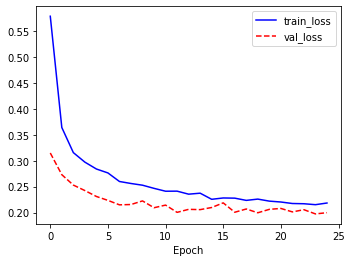

In [110]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label='train_loss')
plt.plot(history.history['val_loss'],'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

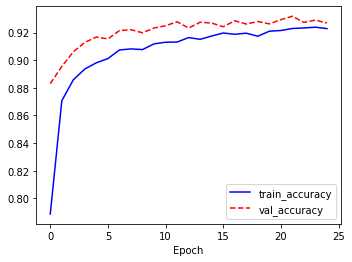

In [111]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'b-',label='train_accuracy')
plt.plot(history.history['val_accuracy'],'r--', label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()